# Data Preprocessing: Data Normalization

Normalization is a data preprocessing technique used to transform the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values or losing information. It’s about adjusting the scale of your data to level the playing field for all the features in your dataset.

## General example on Data for ML

Housing prices dataset. This dataset includes features such as the size of the house (in square feet), the number of bedrooms, and the age of the house (in years), with the target variable being the house price.

In [ ]:
# Sometimes when using JPN on vscode, installing seaborn using the terminal wont work in JPNs and you can do this:
%pip install seaborn

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Seed for reproducibility
np.random.seed(42)

In [21]:
# Generate synthetic housing data with noise
size = np.random.normal(3000, 750, 100) + np.random.normal(0, 200, 100)  # Adding noise
bedrooms = np.random.randint(1, 5, 100)
age = np.random.randint(1, 30, 100)

In [22]:
# Introduce outliers
size[98:100] += 5000  # Extreme size values for outliers
bedrooms[98:100] = 6  # More bedrooms than typical houses
age[98:100] -= 25  # Significantly older

# Simulate house prices with added noise
prices = size * 200 + bedrooms * 5000 + age * -1000 + np.random.normal(0, 15000, 100)

In [23]:
# Create a DataFrame
housing_data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': prices
})

In [24]:
housing_data.head(10)

,Size,Bedrooms,Age,Price
0,3089.461466,2,23,597595.801779
1,2812.172710,2,9,566548.515833
2,3417.223500,1,12,689719.557062
3,3981.816938,4,21,788395.441463
4,2792.127827,1,1,553092.007851
5,2905.207454,1,26,554709.161116
6,4561.646792,3,26,915609.524782
7,3610.491609,2,1,752886.575598
8,2699.404289,4,15,550311.066418
9,3392.030850,3,2,700125.881918


In [25]:
# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_price = MinMaxScaler()

# Normalize the features
features_to_normalize = ['Size', 'Bedrooms', 'Age']
housing_data[features_to_normalize] = scaler_features.fit_transform(housing_data[features_to_normalize])

# Normalize the target variable
housing_data['Price'] = scaler_price.fit_transform(housing_data[['Price']])


In [26]:
housing_data.head(10)

,Size,Bedrooms,Age,Price
0,0.288657,0.2,0.857143,0.272157
1,0.248615,0.2,0.523810,0.250709
2,0.335987,0.0,0.595238,0.335796
3,0.417518,0.6,0.809524,0.403962
4,0.245720,0.0,0.333333,0.241413
5,0.262049,0.0,0.928571,0.242530
6,0.501248,0.4,0.928571,0.491843
7,0.363896,0.2,0.333333,0.379433
8,0.232330,0.6,0.666667,0.239492
9,0.332349,0.4,0.357143,0.342985


In [27]:
# Split the dataset into training and testing sets
X = housing_data.drop('Price', axis=1)
y = housing_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Size,Bedrooms,Age
55,0.355968,0.2,0.428571
88,0.193906,0.0,0.595238
26,0.122473,0.0,0.928571
42,0.216787,0.2,0.690476
69,0.184100,0.4,0.880952
...,...,...,...
60,0.195692,0.6,0.928571
71,0.418752,0.2,0.857143
14,0.083367,0.4,0.619048
92,0.205886,0.6,0.500000


In [32]:
y_train

55    0.370301
88    0.196609
26    0.110194
42    0.210068
69    0.190116
        ...   
60    0.206259
71    0.402230
14    0.072622
92    0.222531
51    0.229561
Name: Price, Length: 80, dtype: float64

In [33]:
X_test

,Size,Bedrooms,Age
83,0.233541,0.2,0.333333
53,0.348693,0.0,0.547619
70,0.289188,0.6,0.690476
45,0.220356,0.2,0.690476
44,0.123114,0.0,0.928571
39,0.261510,0.6,0.785714
22,0.323566,0.0,1.000000
80,0.270017,0.6,0.380952
10,0.170132,0.0,0.833333
0,0.288657,0.2,0.857143


In [31]:
y_test

83    0.225622
53    0.354257
70    0.294357
45    0.230756
44    0.119646
39    0.260113
22    0.303124
80    0.265033
10    0.154509
0     0.272157
18    0.210817
30    0.187054
73    0.451656
33    0.173364
90    0.288898
4     0.241413
76    0.292181
77    0.295600
12    0.299363
31    0.468323
Name: Price, dtype: float64

In [34]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)


In [35]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)


In [36]:
predictions

array([0.2405697 , 0.34074725, 0.29090344, 0.2172417 , 0.11304486,
       0.26151381, 0.30311974, 0.28177944, 0.1609792 , 0.27774881,
       0.19460724, 0.16830004, 0.44923253, 0.17887148, 0.28257684,
       0.24841827, 0.28072746, 0.27767969, 0.29456218, 0.45819785])

In [38]:
# Scale back the predictions to the original price scale
predictions_original_scale = scaler_price.inverse_transform(predictions.reshape(-1, 1))
y_test_original_scale = scaler_price.inverse_transform(y_test.values.reshape(-1, 1))

In [39]:
# Evaluate the model using mean squared error in the original price scale
mse = mean_squared_error(y_test_original_scale, predictions_original_scale)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 242788168.5266358


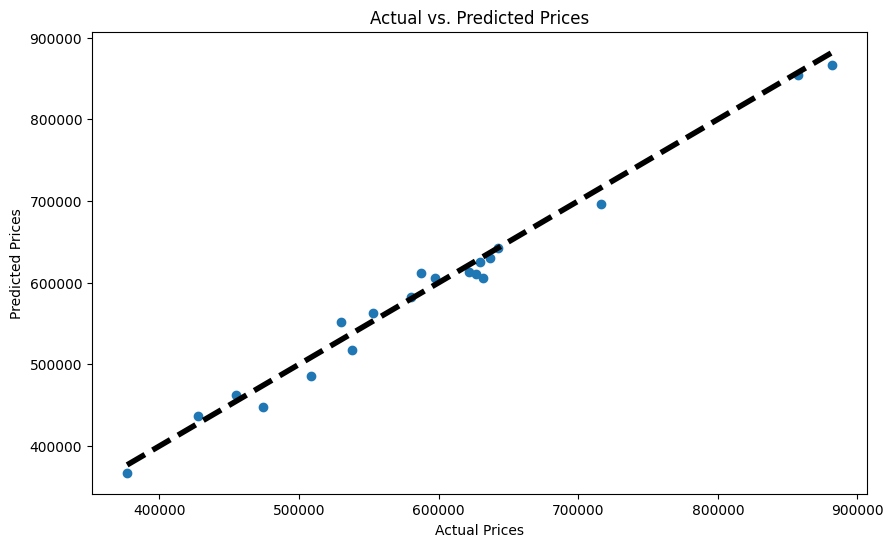

In [40]:
# Visualize actual vs. predicted prices in the original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, predictions_original_scale)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()], [y_test_original_scale.min(), y_test_original_scale.max()], 'k--', lw=4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()